#### Task 4P: Working with pandas Data Frames (Heterogeneous Data)
#### Name: Prateek Singh
#### Student number: 221218743
#### Email: singhprate@deakin.edu.au
#### Unit: SIT731

<br>This task allows us to process weather data which contains hourly meteorological data for three airports in New York: LGA, JFK, and EWR for the year 2013. This allows us to explore the Pandas library to modify, process, and visualise heterogeneous data.
This task also shows how to handle missing/noisy data, which is how the data is encountered in real world.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

1. Convert all columns so that they use metric (International System of Units, SI) or derived units: temp and dewp to Celsius, precip to millimetres, visib to kilometres, as well as wind_speed and wind_gust to km/h. Replace the data in-place (overwrite existing columns with new ones).

In [2]:
#Utility function to change all the columns to SI values
def DFToSI(_df):
    df['temp'] = (df['temp'] - 32) * 5/9
    df['dewp'] = (df['dewp'] - 32) * 5/9
    df['precip'] = df['precip'] * 25.4
    df['visib'] = df['visib'] * 1.60934
    df['wind_speed'] = df['wind_speed'] * 1.60934
    df['wind_gust'] = df['wind_gust'] * 1.60934
    return df

df = pd.read_csv("Resource_Data/weather.csv", comment="#")
df = DFToSI(df)
display(df)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013.9,16.0934,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013.0,16.0934,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.371959,23.443643,0.0,1012.6,16.0934,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.223955,25.574883,0.0,1012.7,16.0934,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.075952,27.706124,0.0,1012.8,16.0934,2013-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,2.2,-6.7,51.78,340.0,22.223955,25.574883,0.0,1017.1,16.0934,2013-12-30 20:00:00
26126,LGA,2013,12,30,20,1.1,-8.3,49.51,330.0,27.779944,31.968604,0.0,1018.8,16.0934,2013-12-30 21:00:00
26127,LGA,2013,12,30,21,0.0,-9.4,49.19,340.0,24.075952,27.706124,0.0,1019.5,16.0934,2013-12-30 22:00:00
26128,LGA,2013,12,30,22,-0.6,-10.6,46.74,320.0,27.779944,31.968604,0.0,1019.9,16.0934,2013-12-30 23:00:00


2. Convert the time_hour column (in-place) to the datetime64 type and then subtract one hour so that data match the information stored in the month, day, and hour fields.

In [3]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['time_hour'] = df['time_hour'] - pd.Timedelta(hours=1)

3. Compute daily mean temperatures (360+ average temperatures for each day separately) for the JFK airport with missing hourly temperature measurements ignored (removed) whatsoever (e.g.,mean of [10, NaN, 20] is simply 15).

In [4]:
jfk_df = df[df['origin'] == 'JFK']
#jfk_df = jfk_df.dropna(subset=['temp'])
jfk_daily_mean = jfk_df.groupby(jfk_df['time_hour'].dt.date)['temp'].mean().dropna()
print(jfk_daily_mean)

time_hour
2013-01-01    3.817391
2013-01-02   -1.920833
2013-01-03   -1.237500
2013-01-04    1.129167
2013-01-05    2.720833
                ...   
2013-12-26    0.383333
2013-12-27    2.220833
2013-12-28    4.966667
2013-12-29    6.533333
2013-12-30    4.620833
Name: temp, Length: 364, dtype: float64


4. Present the daily mean temperatures (360+ data points) in a single plot. The x-axis labels should be human-readable and intuitive (e.g., month names).

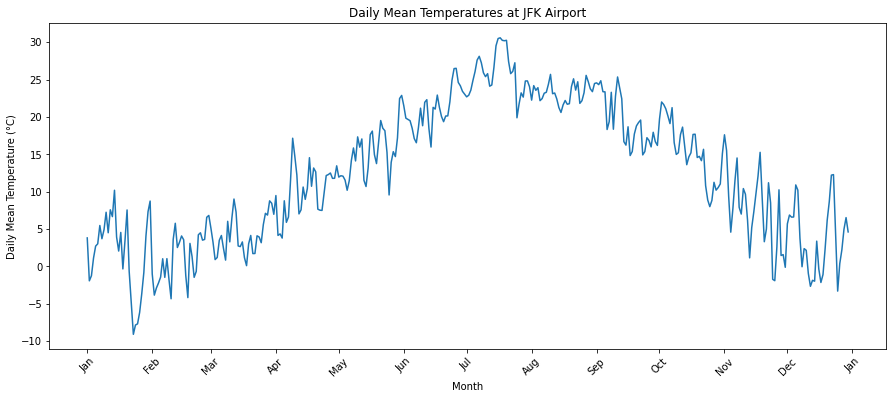

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(jfk_daily_mean.index, jfk_daily_mean, label='JFK')
# Set the x-axis labels to be month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Daily Mean Temperature (°C)')
plt.title('Daily Mean Temperatures at JFK Airport')
plt.show()

5. Find the five hottest days.

In [6]:
num_days = 5
five_hottest_days = df.groupby(df["time_hour"].dt.date)["temp"].mean().sort_values(ascending=False).head(num_days)
print(five_hottest_days)

time_hour
2013-07-19    32.233333
2013-07-18    31.395833
2013-07-20    30.912500
2013-07-17    30.719444
2013-07-16    30.548611
Name: temp, dtype: float64


In [37]:
import datetime
display(df[df["time_hour"].dt.date == datetime.date(2013, 7, 19)])
display(df[df["time_hour"].dt.date == datetime.date(2013, 7, 18)]["temp"].mean())

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
4769,EWR,2013,7,19,0,34.4,21.1,45.92,260.0,12.963974,14.918682,0.0,1014.8,16.09340,2013-07-19 00:00:00
4770,EWR,2013,7,19,1,33.3,21.7,50.67,220.0,9.259981,10.656201,0.0,1014.8,16.09340,2013-07-19 01:00:00
4771,EWR,2013,7,19,2,31.7,22.2,57.18,210.0,12.963974,14.918682,0.0,1014.5,16.09340,2013-07-19 02:00:00
4772,EWR,2013,7,19,3,30.0,23.3,67.36,200.0,12.963974,14.918682,0.0,1014.4,16.09340,2013-07-19 03:00:00
4773,EWR,2013,7,19,4,30.6,23.9,67.48,220.0,16.667967,19.181163,0.0,1014.8,16.09340,2013-07-19 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,LGA,2013,7,19,19,37.2,20.6,38.16,240.0,25.927948,29.837364,0.0,1009.9,16.09340,2013-07-19 19:00:00
22210,LGA,2013,7,19,20,37.2,20.6,38.16,230.0,24.075952,27.706124,0.0,1009.1,16.09340,2013-07-19 20:00:00
22211,LGA,2013,7,19,21,36.1,21.1,41.80,230.0,29.631941,34.099845,0.0,1008.5,16.09340,2013-07-19 21:00:00
22212,LGA,2013,7,19,22,35.0,22.2,47.51,230.0,24.075952,27.706124,0.0,1008.7,16.09340,2013-07-19 22:00:00


31.395833333333332

#### 2. Additional Tasks for Postgraduate (SIT731) Students (*)

1. Compute the daily mean temperatures also for the EWR and LGA airports.

In [7]:
ewr_df = df[df['origin'] == 'EWR']
ewr_df = ewr_df.dropna(subset=['temp'])
ewr_daily_mean = ewr_df.groupby(ewr_df['time_hour'].dt.date)['temp'].mean().dropna()

# Compute daily mean temperatures for LGA
lga_df = df[df['origin'] == 'LGA']
lga_df = lga_df.dropna(subset=['temp'])
lga_daily_mean = lga_df.groupby(lga_df['time_hour'].dt.date)['temp'].mean().dropna()

2. Draw the daily mean temperatures for the three airports in the same plot (three curves of differentcolours). Add a readable legend.

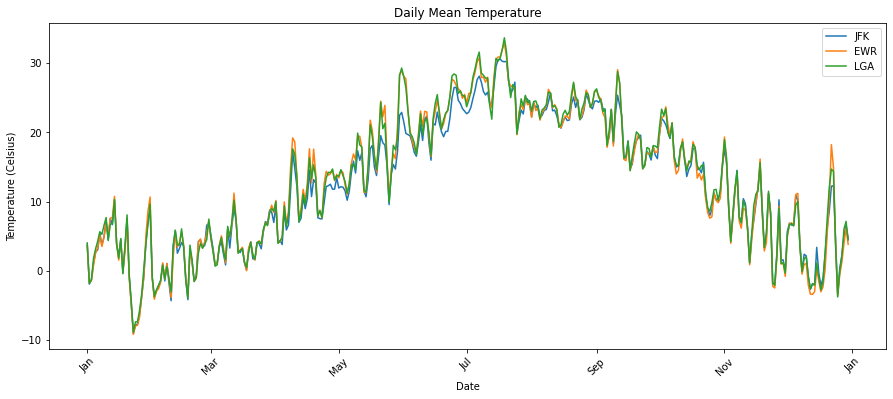

In [8]:
# Plot the daily mean temperatures for JFK, EWR, and LGA
plt.figure(figsize=(15, 6))

jfk_daily_mean.plot(label='JFK')
ewr_daily_mean.plot(label='EWR')
lga_daily_mean.plot(label='LGA')

plt.xlabel("Date")
# Define the x-axis format
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

plt.ylabel("Temperature (Celsius)")
plt.title("Daily Mean Temperature")

plt.legend()
plt.show()

#### 3. Optional Features (**)

1. Mark the days with greater mean temperature than in the preceding day in red and those with smaller – in blue (in the plot).

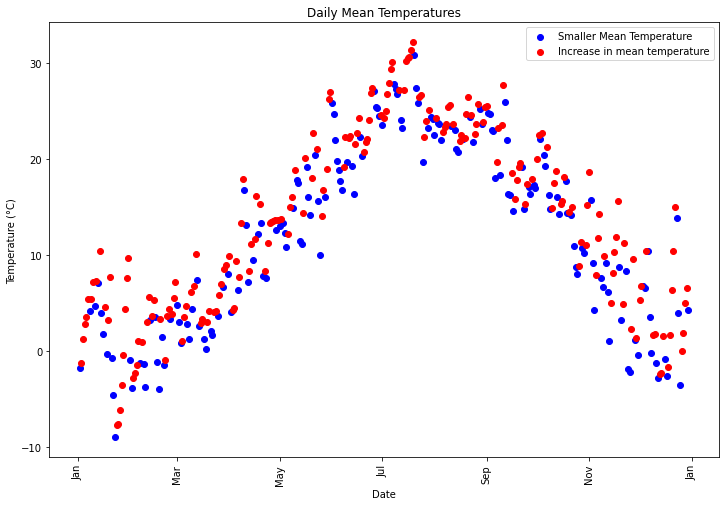

In [9]:
df_daily_mean = df.groupby(df["time_hour"].dt.date)["temp"].mean().dropna()
df_daily_mean = df_daily_mean.reset_index()
df_daily_mean.columns = ["date", "mean_temp"]

plt.figure(figsize=(12, 8))

df_daily_mean["temp_diff"] = df_daily_mean["mean_temp"].diff()

plt.scatter(df_daily_mean[df_daily_mean["temp_diff"] <= 0]["date"], 
            df_daily_mean[df_daily_mean["temp_diff"] <= 0]["mean_temp"], 
            color='blue', 
            label="Smaller Mean Temperature")

plt.scatter(df_daily_mean[df_daily_mean["temp_diff"] > 0]["date"], 
            df_daily_mean[df_daily_mean["temp_diff"] > 0]["mean_temp"], 
            color='red', 
            label="Increase in mean temperature")

plt.xlabel("Date")
# Define the x-axis format
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temperatures')
plt.legend()
plt.xticks(rotation=90)

plt.show()

2. For the JFK airport, list all missing temperature readings. This should include not only the temperatures explicitly marked as missing values, but also the records that were completely omitted, for instance 2013-02-21 06:00:00.

In [10]:
### To find the missing data I'm assuming that hourly data which is not present has to be inserted
### All the other values are null and missing hours are inserted into th dataframe (Done in the follwoing cell)
all_hours = pd.DataFrame(pd.date_range(start=jfk_df["time_hour"].min(), 
                                       end=jfk_df["time_hour"].max(), 
                                       freq="H"), 
                         columns=["time_hour"])

missing_temperature_readings = all_hours[~all_hours["time_hour"].isin(jfk_df["time_hour"])]

#Just display here, populate in next cell
display(missing_temperature_readings)

,time_hour
5,2013-01-01 05:00:00
1229,2013-02-21 05:00:00
1518,2013-03-05 06:00:00
2137,2013-03-31 01:00:00
2208,2013-04-03 00:00:00
5380,2013-08-13 04:00:00
5452,2013-08-16 04:00:00
5541,2013-08-19 21:00:00
5614,2013-08-22 22:00:00
5616,2013-08-23 00:00:00


3. Add the missing records to the dataset (just the date-time information, with all the remaining fields being set to NaN).

In [11]:
date_range = pd.date_range(start='2013-01-01', end='2013-12-31', freq='H')
df_complete = pd.DataFrame({'time_hour': date_range})
df_merged = pd.merge(df_complete, df, how='left', on='time_hour') 
display(df_merged)

,time_hour,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013-01-01 00:00:00,EWR,2013.0,1.0,1.0,0.0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013.9,16.0934
1,2013-01-01 00:00:00,JFK,2013.0,1.0,1.0,0.0,3.3,-5.0,54.51,240.0,25.927948,29.837364,0.0,1014.4,16.0934
2,2013-01-01 00:00:00,LGA,2013.0,1.0,1.0,0.0,3.9,-7.2,44.18,240.0,22.223955,25.574883,0.0,1013.7,16.0934
3,2013-01-01 01:00:00,EWR,2013.0,1.0,1.0,1.0,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013.0,16.0934
4,2013-01-01 01:00:00,JFK,2013.0,1.0,1.0,1.0,3.3,-4.4,57.04,250.0,27.779944,31.968604,0.0,1013.5,16.0934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26144,2013-12-30 22:00:00,LGA,2013.0,12.0,30.0,22.0,-0.6,-10.6,46.74,320.0,27.779944,31.968604,0.0,1019.9,16.0934
26145,2013-12-30 23:00:00,EWR,2013.0,12.0,30.0,23.0,-1.7,-11.1,48.69,330.0,24.075952,27.706124,0.0,1021.1,16.0934
26146,2013-12-30 23:00:00,JFK,2013.0,12.0,30.0,23.0,-1.1,-12.2,42.66,340.0,29.631941,34.099845,0.0,1020.9,16.0934
26147,2013-12-30 23:00:00,LGA,2013.0,12.0,30.0,23.0,-1.7,-11.7,46.41,330.0,29.631941,34.099845,0.0,1020.9,16.0934


4. Re-compute the daily average temperatures, this time by linearly interpolating between the preceding and following non-missing data, e.g., a temperature sequence of [..., 10, NaN, NaN, 40, ...] should be transformed to [..., 10, 20, 30, 40, ...].

In [12]:
df_interpolated = df_merged.copy() #Creating a new df from original to preserve original data
df_interpolated['temp'] = df_interpolated['temp'].interpolate(method="linear")
display(df_interpolated)

,time_hour,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013-01-01 00:00:00,EWR,2013.0,1.0,1.0,0.0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013.9,16.0934
1,2013-01-01 00:00:00,JFK,2013.0,1.0,1.0,0.0,3.3,-5.0,54.51,240.0,25.927948,29.837364,0.0,1014.4,16.0934
2,2013-01-01 00:00:00,LGA,2013.0,1.0,1.0,0.0,3.9,-7.2,44.18,240.0,22.223955,25.574883,0.0,1013.7,16.0934
3,2013-01-01 01:00:00,EWR,2013.0,1.0,1.0,1.0,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013.0,16.0934
4,2013-01-01 01:00:00,JFK,2013.0,1.0,1.0,1.0,3.3,-4.4,57.04,250.0,27.779944,31.968604,0.0,1013.5,16.0934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26144,2013-12-30 22:00:00,LGA,2013.0,12.0,30.0,22.0,-0.6,-10.6,46.74,320.0,27.779944,31.968604,0.0,1019.9,16.0934
26145,2013-12-30 23:00:00,EWR,2013.0,12.0,30.0,23.0,-1.7,-11.1,48.69,330.0,24.075952,27.706124,0.0,1021.1,16.0934
26146,2013-12-30 23:00:00,JFK,2013.0,12.0,30.0,23.0,-1.1,-12.2,42.66,340.0,29.631941,34.099845,0.0,1020.9,16.0934
26147,2013-12-30 23:00:00,LGA,2013.0,12.0,30.0,23.0,-1.7,-11.7,46.41,330.0,29.631941,34.099845,0.0,1020.9,16.0934


5. Draw a plot of average daily temperatures comparing the missing value-omitted vs linearly interpolated cases.

<Figure size 1080x432 with 0 Axes>

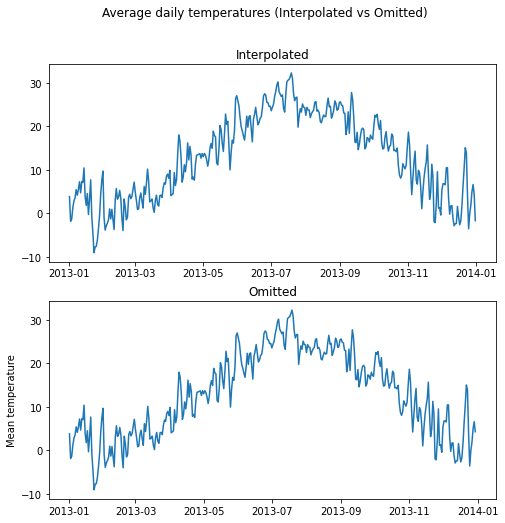

In [13]:
interpolated_mean_temp = df_interpolated.groupby(df_interpolated["time_hour"].dt.date).mean()["temp"]
omitted_mean_temp = df.groupby(df["time_hour"].dt.date)["temp"].mean().dropna()

plt.figure(figsize=(15, 6))
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))
fig.suptitle("Average daily temperatures (Interpolated vs Omitted)")


ax1.set_title("Interpolated")
ax1.plot(interpolated_mean_temp, label="Interpolated")
ax2.set_title('Omitted')
ax2.plot(omitted_mean_temp, label="Omitted")

plt.ylabel("Mean temperature")
plt.show()